# 15. Classifying Images with Deep Convolutional Neural Networks

## Contents

- [15.01. The building blocks of CNNs][1501]
    - [15.01.01. Understanding CNNs and features hierachies][150101]
    - [15.01.02. Performing discrete convolutions][150102]
        - [15.01.02.01. Discrete convolutions in one dimension][15010201]
        - [15.01.02.02. Padding inputs to control the size of the output feature maps][15010202]
        - [15.01.02.03. Determining the size of the convolution output][15010203]
        - [15.01.02.04. Performing a discrete convoution in 2D][15010204]
    - [15.01.03. Subsampling layers][150103]
- [15.02. Putting everything together - implementing a CNN][1502]
    - [15.02.01. Working with multiple input or color channels][150201]
    - [15.02.02. Regularizing an NN with dropout][150202]
    - [15.02.03. Loss functions for classification][150203]
- [15.03. Implementing a deep CNN using TensorFlow][1503]
    - [15.03.01. The multilayer CNN architecture][150301]
    - [15.03.02. Loading and preprocessing the data][150302]
    - [15.03.03. Implemeting a CNN using the TensorFlow Keras API][150303]
        - [15.03.03.01. Configuration CNN layers in Keras][15030301]
        - [15.03.03.02. Constructing a CNN in Keras][15030302]
- [15.04. Gender classigcation from face images using][1504]
    - [15.04.01. Loading the CelebA dataset][150401]
    - [15.04.02. Image transformation and data augmentation][150401]
    - [15.04.03. Training a CNN gender classifier][150403]
- [15.05. Summary][1505]

In [2]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


UsageError: unrecognized arguments: scipy pandas matplotlib sklearn tensorflow nltk


In [6]:
%watermark -u -d -t -v -p numpy,scipy,pandas,matplotlib,sklearn,tensorflow,tensorflow_datasets,nltk

Last updated: 2021-05-02 17:49:05

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.22.0

numpy              : 1.19.2
scipy              : 1.6.2
pandas             : 1.2.2
matplotlib         : 3.3.2
sklearn            : 0.24.1
tensorflow         : 2.0.0
tensorflow_datasets: not installed
nltk               : 3.5



## 15.01. The building blocks of CNNs

### 15.01.01. Understanding CNNs and features hierachies

**salient (relevant) features**

**feature hierarchy**

**feature map**

**local receptive field**

2 ideas:

- **sparse connectivity**
- **parameter-sharing**

$w_{ij}$  
input unit $i$, output unit $j$

pooling layers

### 15.01.02. Performing discrete convolutions

**(discrete) convolution**


#### 15.01.02.01. Dscrete convolutions in one dimension

vec $x$, $w$  
$y = x \ast w$

signal $x$, filter/kernel $w$

$$y = x \ast w \rightarrow y[i] = \sum_{k=-\infty}^{+\infty}{x[i-k]w[k]}$$

**(zero-)padding**

$m ≤ n$ $x^p$

$x$ have $n$ elements, $w$ have $m$ elements

padded vector $x^p$

$$y = x \ast w \rightarrow y[i] = \sum_{k=0}^{k=m-1}{x^p[i+m-k] w[k]}$$

$w^r$

$x[i:i+m]$




#### 15.01.02.02. Padding inputs to control the size of the output feature maps

#### 15.01.02.03. Determining the size of the convolution output

In [2]:
import numpy as np

def convld(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad, x_padded, zero_pad])
    
    res = []
    
    for i in range(0, int(len(x)/s), s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
        
    return np.array(res)

In [3]:
# Testing:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Convid implementation:', convld(x, w, p=2, s=1))

Convid implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]


In [4]:
print('Numpy Results:', np.convolve(x, w, mode='same'))

Numpy Results: [ 5 14 16 26 24 34 19 22]


#### 15.01.02.04. Performing a discrete convoution in 2D

In [2]:
import numpy as np
import scipy.signal

def conv2d(X, W, p=(0,0), s=(1,1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0], 
             p[1]:p[1]+X_orig.shape[1]] = X_orig
    res = []
    
    for i in range(0, int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        
        for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0], j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    
    return(np.array(res))

Conv2d Impplementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]


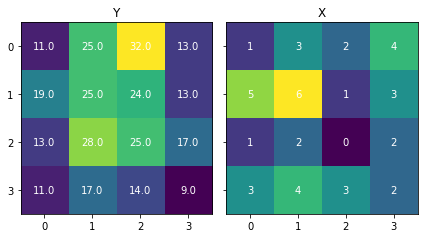

In [6]:
X = [[1,3,2,4], [5,6,1,3], [1,2,0,2], [3,4,3,2]]
W = [[1,0,3], [1,2,1], [0,1,1]]

Y = conv2d(X,W, p=(1,1), s=(1,1))

print('Conv2d Impplementation:\n', Y)

fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].imshow(Y)
ax[1].imshow(X)

for i in range(4):
    for j in range(4):
        ax[0].text(j, i, Y[i, j], ha='center', va='center', color='w')

X = np.array(X)
for i in range(4):
    for j in range(4):
        ax[1].text(j, i, X[i, j], ha='center', va='center', color='w')
        

ax[0].set_yticks(np.arange(4))

ax[0].set_title('Y')
ax[1].set_title('X')
fig.tight_layout()
plt.show()

In [16]:
print('SciPy Results:\n', scipy.signal.convolve2d(X, W, mode='same'))

SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


### 15.01.03. Subsampling layers

## 15.02. Putting everything together - implementing a CNN

### 15.02.01. Working with multiple input or color channels

###### Reading an image file

`unit8`: unsigned 8-bit integer

In [7]:
import tensorflow as tf

img_raw = tf.io.read_file('watchmen.png')
img = tf.image.decode_image(img_raw)
print('Image shape:', img.shape)

Image shape: (332, 332, 4)


In [8]:
import imageio

img = imageio.imread('watchmen.png')
print('Image shape:', img.shape)

print('Number data type:', img.dtype)

print(img[100:102, 100:102, :])

Image shape: (332, 332, 4)
Number data type: uint8
[[[255 236   0 255]
  [255 236   0 255]]

 [[255 236   0 255]
  [255 236   0 255]]]


### 15.02.02. Regularizing an NN with dropout

In [9]:
from tensorflow import keras

conv_layer = keras.layers.Conv2D(
    filters=16, 
    kernel_size=(3,3), kernel_regularizer=keras.regularizers.l2(.001))

fc_layer = keras.layers.Dense(
    units=16, 
    kernel_regularizer=keras.regularizers.l2(.001))

### 15.02.03. Loss functions for classification

In [2]:
import tensorflow_datasets as tfds

### Binary Crossentropy

bce_probas = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)
logits = tf.constant([0.8])
probas = tf.keras.activations.sigmoid(logits)

tf.print(
    'BCE \n(w Probas): {:.4f}'.format(
        bce_probas(y_true=[1], y_pred=probas)), 
    '(w Logits): {:.4f}\n'.format(
        bce_logits(y_true=[1], y_pred=logits)))


### Categorical Crossentropy

cce_probas = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce_logits = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
probas = tf.keras.activations.softmax(logits)

tf.print(
    'CCE \n(w Probas): {:.4f}'.format(
        cce_probas(y_true=[0, 0, 1], y_pred=probas)), 
    '(w Logits): {:.4f}\n'.format(
        cce_logits(y_true=[0, 0, 1], y_pred=logits)))

### Sparcse Categorical Crossentropy

sp_cce_probas = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
sp_cce_logits = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

tf.print(
    'Sparse CCE \n(w Probas): {:.4f}'.format(
        sp_cce_probas(y_true=[2], y_pred=probas)), 
    '(w Logits): {:.4f}'.format(
        sp_cce_logits(y_true=[2], y_pred=logits)))

BCE 
(w Probas): 0.3711 (w Logits): 0.3711

CCE 
(w Probas): 0.5996 (w Logits): 0.5996

Sparse CCE 
(w Probas): 0.5996 (w Logits): 0.5996


## 15.03. Implementing a deep CNN using TensorFlow

### 15.03.01. The multilayer CNN architecture

### 15.03.02. Loading and preprocessing the data

In [3]:
import tensorflow_datasets as tfds

## Loading the data
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
mnist_train_orig = datasets['train']
mnist_test_orig = datasets['test']

/Users/shumez/opt/anaconda3/envs/pyml3env/lib/python3.7/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Users/shumez/opt/anaconda3/envs/pyml3env/lib/python3.7/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/Users/shumez/opt/anaconda3/envs/pyml3env/lib/python3.7/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/e

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset mnist downloaded and prepared to /Users/shumez/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20
mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                 tf.cast(item['label'], tf.int32)))
mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)
mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE, 
                                  reshuffle_each_iteration=False)
mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

### 15.03.03. Implemeting a CNN using the TensorFlow Keras API

#### 15.03.03.01. Configuration CNN layers in Keras

#### 15.03.03.02. Constructing a CNN in Keras

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, 
    kernel_size=(5,5), 
    strides=(1,1), 
    padding='same', 
    data_format='channels_last', 
    name='conv_1', 
    activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2,2), 
    name='pool_1'))

model.add(tf.keras.layers.Conv2D(
    filters=64, 
    kernel_size=(5,5), 
    strides=(1,1), 
    padding='same', 
    name='conv_2', 
    activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2,2), 
    name='pool_2'))

In [8]:
model.compute_output_shape(input_shape=(16,28,28,1))

TensorShape([16, 7, 7, 64])

In [9]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', activation='relu'))
model.add(tf.keras.layers.Dropout(
    rate=.5))
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2', activation='softmax'))

## 15.04. Gender classigcation from face images using

### 15.04.01. Loading the CelebA dataset

### 15.04.02. Image transformation and data augmentation

### 15.04.03. Training a CNN gender classifier

## 15.05. Summary